## Importing the required libraries and dataset for EDA

In [1]:
# Importing libraries for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing

# Importing Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Setting a color palette
cust_pal = ["#582f0e", "#7f4f24", "#936639", "#a68a64", "#b6ad90", "#c2c5aa", "#a4ac86", "#656d4a", "#414833", "#333d29"]
sns.set_palette(cust_pal)

In [3]:
# Loading the data
df = pd.read_csv("epi_r.csv", header = 0)
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(20052, 680)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


## Data Cleaning and Formatting

#### Handling Null Values

In [6]:
null_val = df.isnull().sum()
null_val

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [7]:
null_val[null_val.values != 0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
null_col = ["calories", "protein", "fat", "sodium"]
for i in null_col:
    df[i].fillna(df[i].mean(), inplace = True)

In [9]:
df.isnull().sum()

title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64

In [10]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,2.005200e+04,20052.000000,2.005200e+04,2.005200e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.200697e+05,3418.593885,1.819768e+04,2.971161e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,2.290000e+02,4.000000,1.000000e+01,1.230000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,4.450000e+02,15.000000,2.400000e+01,4.665000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,1.240000e+03,73.000000,8.200000e+01,1.914500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df = df[df["calories"] > 0]
df = df[~((df["protein"] == 0) & (df["fat"] == 0) & (df["sodium"] == 0))]

In [12]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20016.000000,2.001600e+04,20016.000000,2.001600e+04,2.001600e+04,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,...,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000,20016.000000
mean,3.716714,6.334235e+03,100.315918,3.474147e+02,6.237051e+03,0.000300,0.000050,0.000849,0.001349,0.000350,...,0.001249,0.026379,0.000050,0.000300,0.014888,0.000150,0.000350,0.001399,0.000949,0.022782
std,1.338583,3.203573e+05,3421.664658,1.821403e+04,2.973830e+05,0.017311,0.007068,0.029131,0.036704,0.018698,...,0.035320,0.160263,0.007068,0.017311,0.121108,0.012242,0.018698,0.037376,0.030796,0.149211
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,2.300000e+02,4.000000,1.000000e+01,1.240000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,4.470000e+02,15.000000,2.400000e+01,4.680000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,1.243000e+03,73.250000,8.200000e+01,1.920000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# List of all the columns
list(df.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

#### Outlier Treatment

In [14]:
df.iloc[:, 1:6]

,rating,calories,protein,fat,sodium
0,2.500,426.000000,30.000000,7.000000,559.000000
1,4.375,403.000000,18.000000,23.000000,1439.000000
2,3.750,165.000000,6.000000,7.000000,165.000000
3,5.000,6322.958017,100.160793,346.877497,6225.974895
4,3.125,547.000000,20.000000,32.000000,452.000000
...,...,...,...,...,...
20047,3.125,28.000000,2.000000,2.000000,64.000000
20048,4.375,671.000000,22.000000,28.000000,583.000000
20049,4.375,563.000000,31.000000,38.000000,652.000000
20050,4.375,631.000000,45.000000,24.000000,517.000000


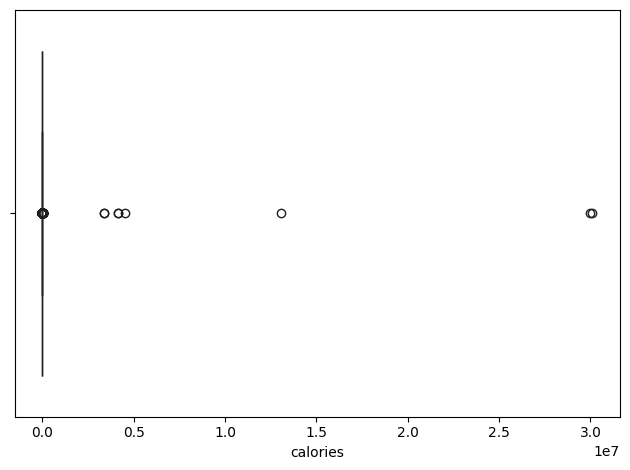

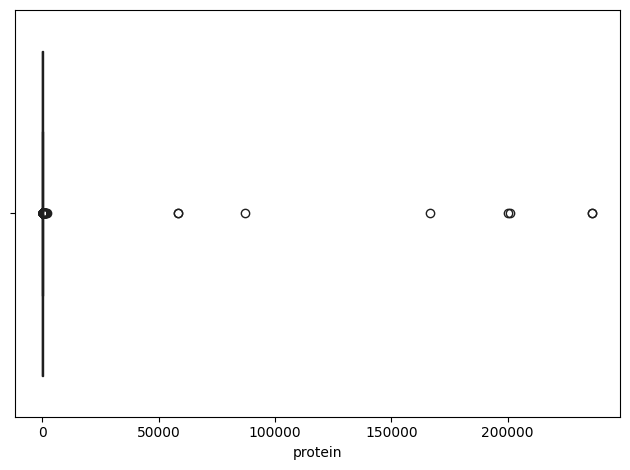

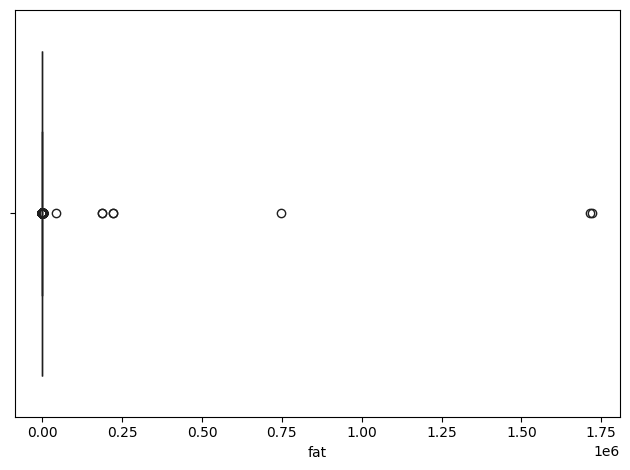

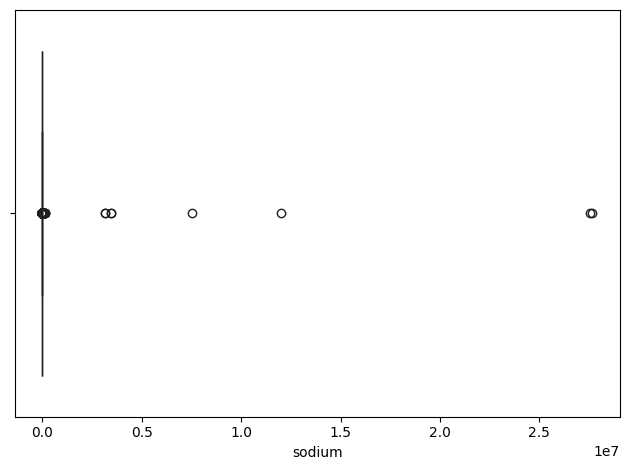

In [15]:
# Using Box-Plot to visualize outliers
cols_to_process = df.iloc[:, 2:6]

for col in cols_to_process.columns:
    sns.boxplot(x = df[col])
    plt.tight_layout()        # Adjust layout to make sure everything fits without overlapping
    plt.show()

In [16]:
# Handling outliers by using Inter Quartile Range
Q1 = cols_to_process.quantile(0.25)
Q3 = cols_to_process.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in cols_to_process.columns:
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])

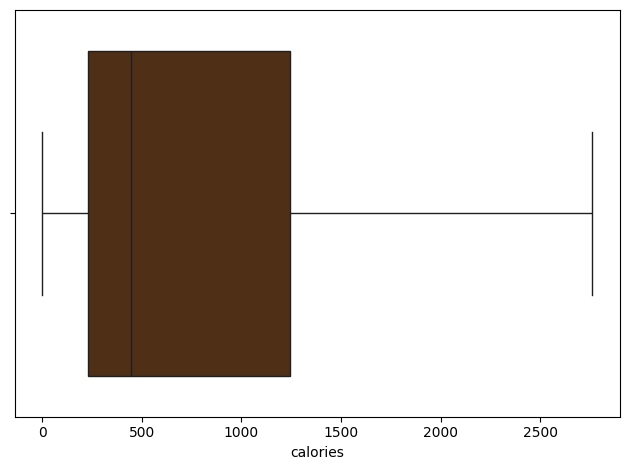

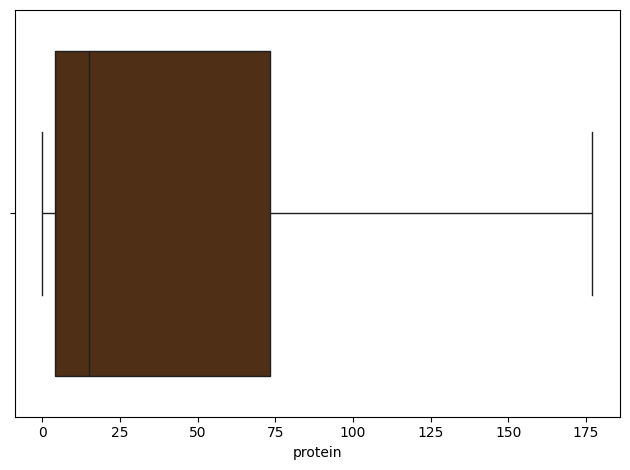

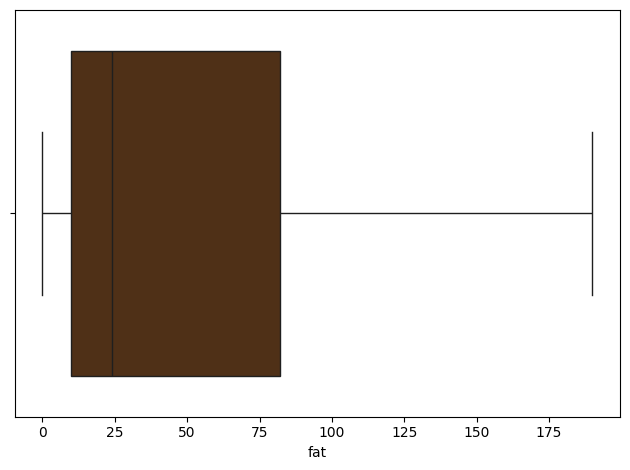

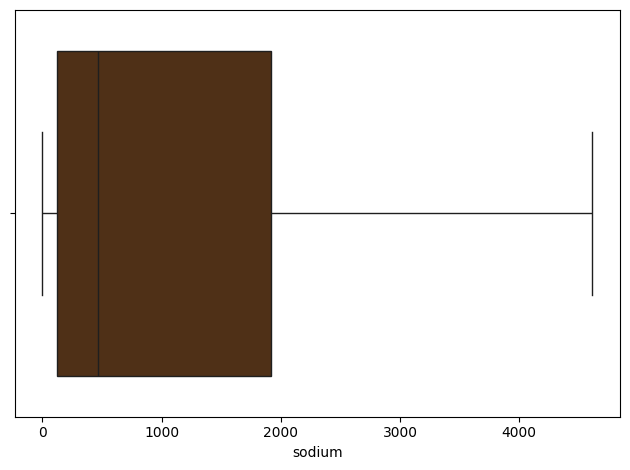

In [17]:
# Box-Plot after removing outliers
for col in cols_to_process.columns:
    sns.boxplot(x = df[col])
    plt.tight_layout()
    plt.show()

From Business knowledge, further filtering the data

In [18]:
df = df[df["rating"] > 0]
df = df[df["calories"] < 2800]
df = df[df["protein"] < 140]
df = df[df["fat"] < 180]
df = df[df["sodium"] < 4400]

#### Droping the columns which contains majority 0 value as they don't provide any value to the analysis

In [19]:
df_to_clean = df.iloc[:, 6:]

# Columns where the proportion of zeros is greater than the threshold 99%
columns_to_drop = df_to_clean.columns[(df_to_clean == 0).mean() > 0.99]

# Dropping columns from the original dataset
df = df.drop(columns = columns_to_drop)

In [20]:
# Remaining columns
list(df.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 'alcoholic',
 'almond',
 'appetizer',
 'apple',
 'apricot',
 'arugula',
 'asparagus',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'basil',
 'bean',
 'beef',
 'bell pepper',
 'berry',
 'blender',
 'blue cheese',
 'boil',
 'bon appétit',
 'braise',
 'brandy',
 'bread',
 'breakfast',
 'broil',
 'brunch',
 'cabbage',
 'cake',
 'carrot',
 'casserole/gratin',
 'celery',
 'cheddar',
 'cheese',
 'cherry',
 'chicken',
 'chill',
 'chive',
 'chocolate',
 'christmas',
 'christmas eve',
 'cilantro',
 'cinnamon',
 'citrus',
 'cocktail',
 'cocktail party',
 'coconut',
 'condiment/spread',
 'cookies',
 'corn',
 'cornmeal',
 'cranberry',
 'cream cheese',
 'cucumber',
 'curry',
 'dairy',
 'dairy free',
 'dessert',
 'dill',
 'dinner',
 'dried fruit',
 'drink',
 'easter',
 'egg',
 'eggplant',
 'fall',
 'family reunion',
 'fat free',
 "father's day",
 'fennel',
 'feta',
 'fish',
 'food processor',
 'fourth of july',
 

In [21]:
df.describe()

,rating,calories,protein,fat,sodium,alcoholic,almond,appetizer,apple,apricot,...,vegetable,vegetarian,vinegar,walnut,wheat/gluten-free,white wine,winter,yogurt,zucchini,turkey
count,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,...,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000,14088.000000
mean,4.090538,438.260931,18.030889,24.751136,502.646011,0.023140,0.030239,0.069208,0.033717,0.014409,...,0.112862,0.363927,0.035065,0.022359,0.250355,0.027257,0.168867,0.022785,0.015190,0.015758
std,0.655631,350.895316,21.999506,25.034233,605.365425,0.150354,0.171249,0.253816,0.180505,0.119176,...,0.316435,0.481145,0.183951,0.147855,0.433233,0.162838,0.374648,0.149224,0.122313,0.124543
min,1.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,205.000000,3.000000,8.000000,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,337.000000,8.000000,18.000000,297.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,575.250000,26.000000,32.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2762.500000,139.000000,179.000000,4353.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.head()

,title,rating,calories,protein,fat,sodium,alcoholic,almond,appetizer,apple,...,vegetable,vegetarian,vinegar,walnut,wheat/gluten-free,white wine,winter,yogurt,zucchini,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA and Data Visualization

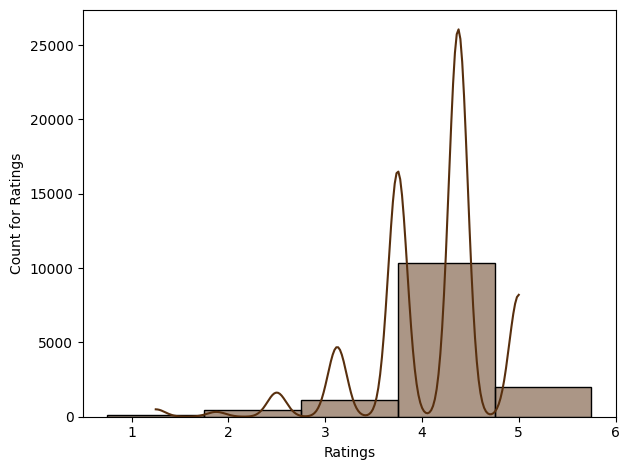

In [23]:
# Visualizing the distribution of Ratings column
sns.histplot(data = df, x = "rating", kde = True, discrete = True)

plt.xlabel("Ratings")
plt.ylabel("Count for Ratings")
plt.tight_layout()

plt.show()

**Observation:**
* A large number of the dishes have ratings between 4 and 5.

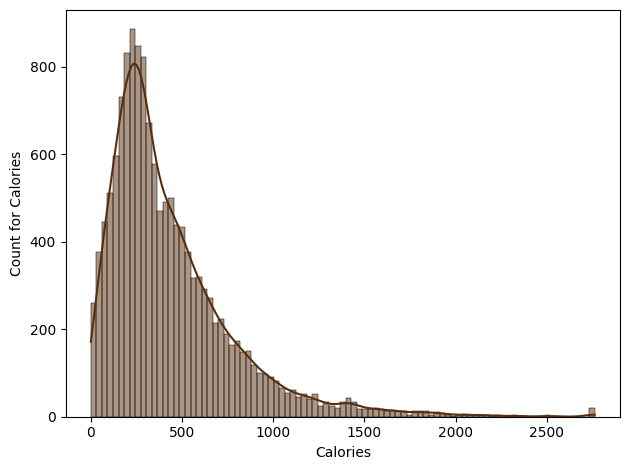

In [24]:
# Visualizing the distribution of Calories column
sns.histplot(data = df, x = "calories", kde = True)

plt.xlabel("Calories")
plt.ylabel("Count for Calories")
plt.tight_layout()

plt.show()

**Observation:**

* The distribution is Right-Skewed.
* Majority of the dishes have calories between 100 and 700 in them.

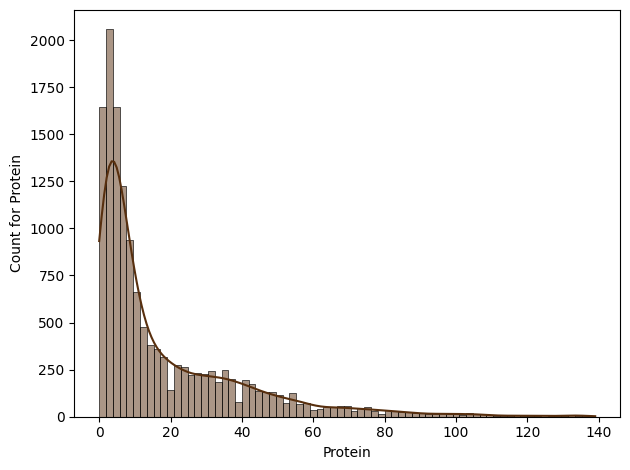

In [25]:
# Visualizing the distribution of Protein column
sns.histplot(data = df, x = "protein", kde = True)

plt.xlabel("Protein")
plt.ylabel("Count for Protein")
plt.tight_layout()

plt.show()

**Observation:**

* The distribution is Right-Skewed.
* Majority of dishes contain protein between 0 and 20 in them.

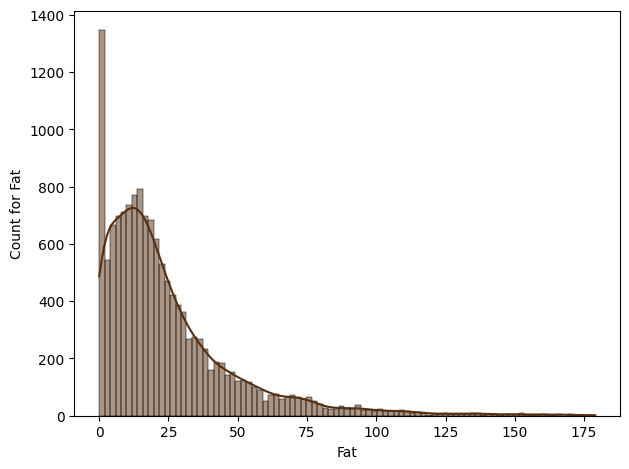

In [26]:
# Visualizing the distribution of Fat column
sns.histplot(data = df, x = "fat", kde = True)

plt.xlabel("Fat")
plt.ylabel("Count for Fat")
plt.tight_layout()

plt.show()

**Observation:**

* The distribution is Right-Skewed.
* Majority of dishes contain fat between 0 and 30 in them.

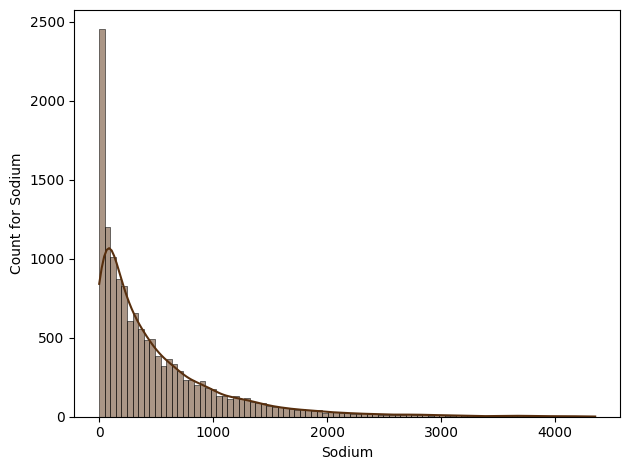

In [27]:
# Visualizing the distribution of Sodium column
sns.histplot(data = df, x = "sodium", kde = True)

plt.xlabel("Sodium")
plt.ylabel("Count for Sodium")
plt.tight_layout()

plt.show()

**Observation:**

* The distribution is Right-Skewed.
* Majority of dishes contain sodium between 0 and 500 in them.

#### Correlation Analysis

In [28]:
df.iloc[:, 1:6].corr()

,rating,calories,protein,fat,sodium
rating,1.000000,0.038011,0.028309,0.042562,0.025094
calories,0.038011,1.000000,0.723545,0.891020,0.462210
protein,0.028309,0.723545,1.000000,0.640901,0.521640
fat,0.042562,0.891020,0.640901,1.000000,0.377257
sodium,0.025094,0.462210,0.521640,0.377257,1.000000


Visualizing the Correlation Table using a Heatmap.

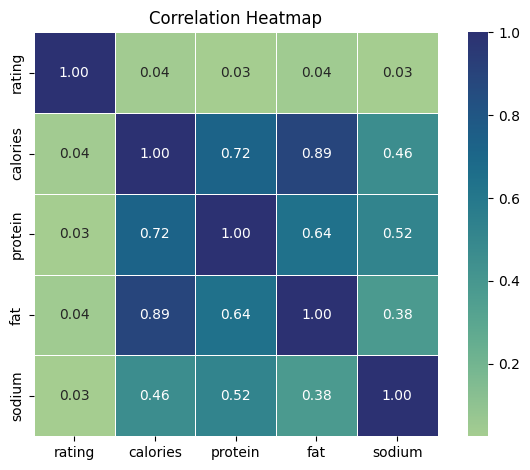

In [29]:
sns.heatmap(df.iloc[:, 1:6].corr(), cmap = "crest", annot = True, fmt = ".2f", 
            linewidths = 0.5, linecolor = "white", square = True)

plt.title("Correlation Heatmap")
plt.tight_layout()

plt.show()

**Observation:**

* Rating doesn't have correlation with any of the above variables.
* `Fat and Calories` are highly correlated with a correlation coefficient of `0.89`, followed by `Protein and Calories` with correlation coefficient of `0.72`, and then by `Fat and Protein` with correlation coefficient of `0.64`.

#### Visualizing Relation between the Highly Correlated Variables

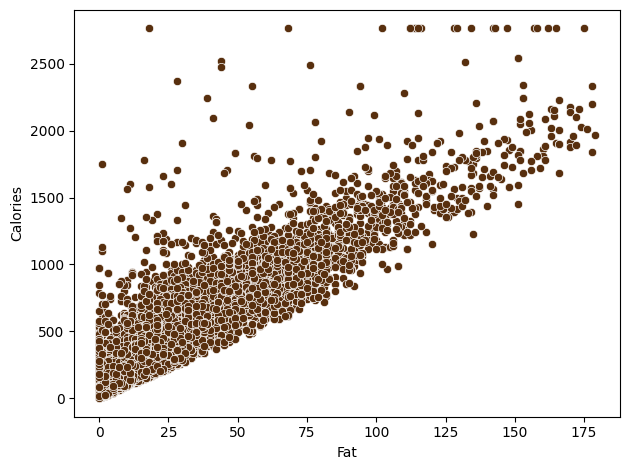

In [30]:
# Visualizing Correlation between Fat and Calories
sns.scatterplot(data = df, x = "fat", y = "calories")

plt.xlabel("Fat")
plt.ylabel("Calories")
plt.tight_layout()

plt.show()

**Observation:**

* A linear line can be seen suggesting very high correlation.
* Foods that are high in fat often have a higher total caloric content, which confirms this high correlation pattern.

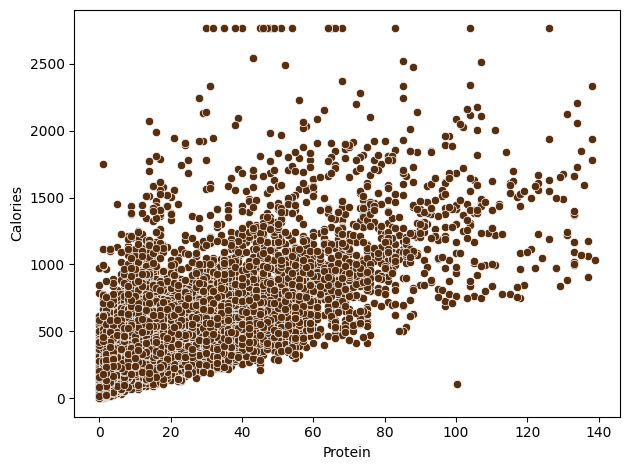

In [31]:
# Visualizing Correlation between Protein and Calories
sns.scatterplot(data = df, x = "protein", y = "calories")

plt.xlabel("Protein")
plt.ylabel("Calories")
plt.tight_layout()

plt.show()

**Observation:**

* A linear pattern can be seen suggesting a high correlation.
* We know that high-protein foods can also be high in calories, especially if they contain a lot of fat. So this confirms the above highly correlated pattern.

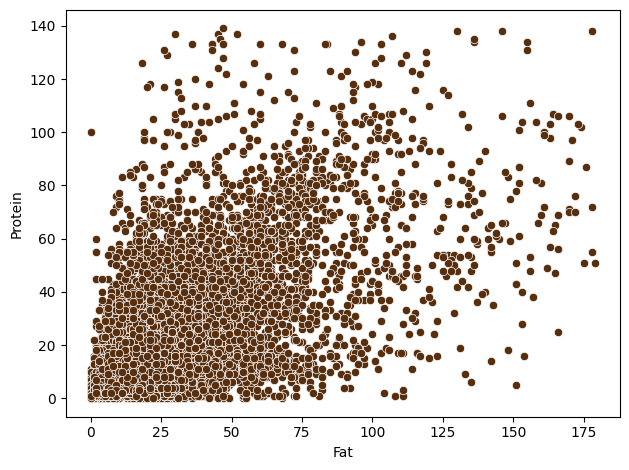

In [32]:
# Visualizing Correlation between Fat and Protein
sns.scatterplot(data = df, x = "fat", y = "protein")

plt.xlabel("Fat")
plt.ylabel("Protein")
plt.tight_layout()

plt.show()

**Observation:**

* A linear pattern can be seen suggesting correlation, but not very high.
* This may be due to the fact that they both serve different purposes, but as many diets include both of them, thus we can see a correlation between them.

#### Which are more popular? Veg or Non-Veg Dishes?

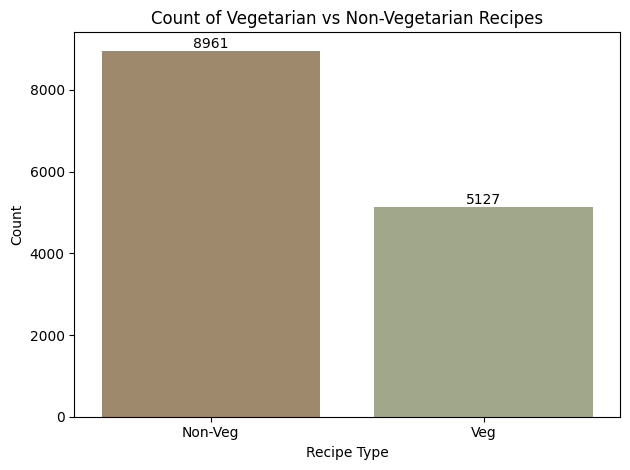

In [33]:
ax = sns.countplot(data = df, x = "vegetarian", palette = ["#a68a64", "#a4ac86"])

for container in ax.containers:  # Iterate through both containers
    ax.bar_label(container)

plt.title("Count of Vegetarian vs Non-Vegetarian Recipes")
plt.xlabel("Recipe Type")
plt.ylabel("Count")

plt.xticks(ticks = [0, 1], labels = ["Non-Veg", "Veg"])

plt.tight_layout()
plt.show()

**Observation:**

* The number of non-veg recipes is nearly twice as much as veg recipes.
* This might suggest that people who cook or share recipes online prefer non-veg dishes. However, it doesn’t mean the general population has the same preference.

#### What are the most common ingredients in highly rated recipes?

Let us assume that dishes with a rating of more than 4 are highly rated.

In [34]:
# Creating a new dataframe which only contains recipes with rating more than 4
high_rat = df[df["rating"] > 4]

In [35]:
# Creating a dictionary to store the most used ingredients
my_dict = dict()
for i in high_rat.iloc[:, 6:].columns:
    value = high_rat[i].sum()
    my_dict[i] = value

sorted_dict = dict(sorted(my_dict.items(), key = lambda item : item[1], reverse = True))

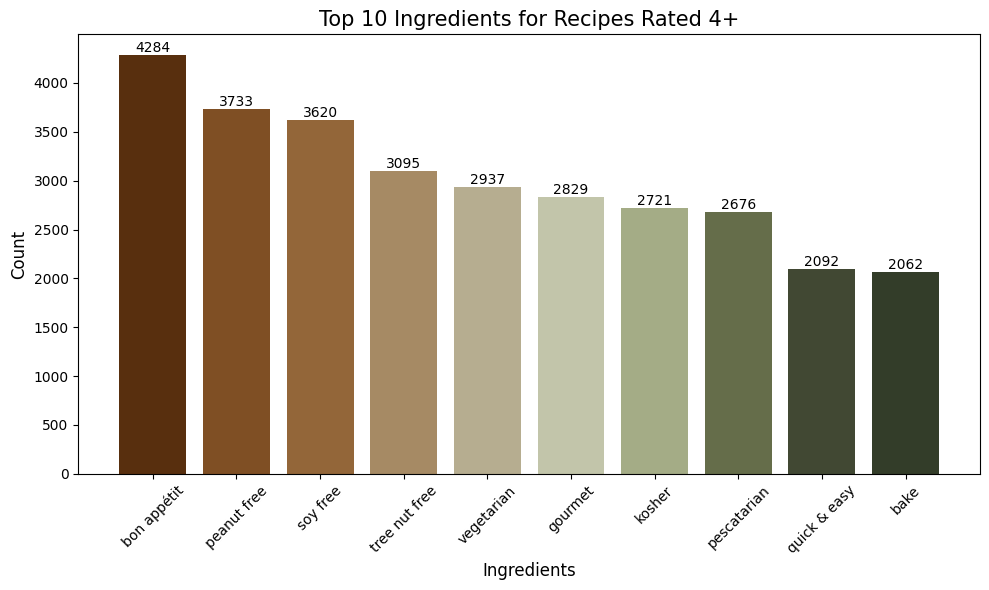

In [36]:
# Extracting the top 10 ingredients
top_10_ingredients = dict(list(sorted_dict.items())[:10])

# Plotting the bar chart
plt.figure(figsize = (10, 6))
ax = plt.bar(top_10_ingredients.keys(), top_10_ingredients.values(), color = sns.color_palette())

plt.xlabel("Ingredients", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Top 10 Ingredients for Recipes Rated 4+", fontsize = 15)
plt.xticks(rotation = 45)
plt.tight_layout()  

# Adding data labels
for i in ax:
    y_val = i.get_height()
    plt.text(i.get_x() + i.get_width()/2, y_val, int(y_val), va = "bottom", ha = "center", fontsize = 10)
    
plt.show()

**Observation:**

* The top 10 values seems to be labels, preferences, etc instead of label.
* Thus, it requires further processing to separate ingredients from all the other items.

#### What are the top vegetarian dishes by calories count?

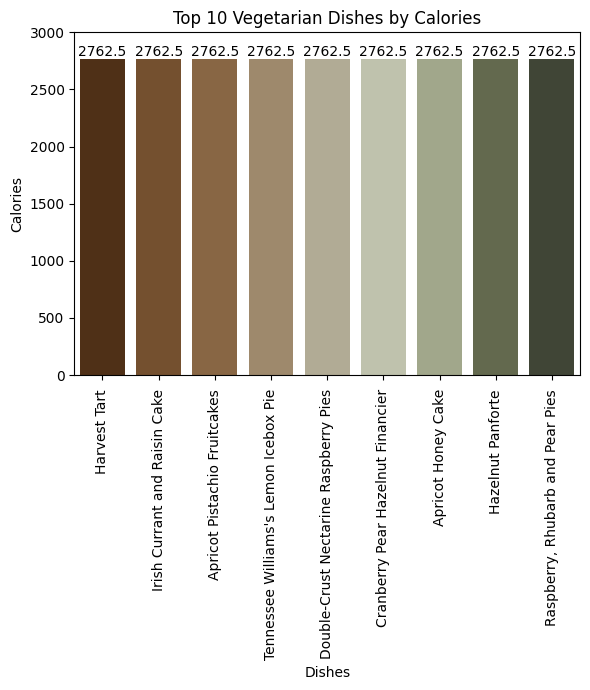

In [37]:
# Top 10 vegetarian dishes by calories
top_veg = df[df["vegetarian"] == 1].nlargest(10, "calories")

plt.figure(figsize = (6, 7))

# Plot for Vegetarian Dishes
ax = sns.barplot(data = top_veg, x = "title", y = "calories", palette = cust_pal)

plt.title("Top 10 Vegetarian Dishes by Calories")
plt.xlabel("Dishes")
plt.ylabel("Calories")
plt.xticks(rotation = 90)
y_ticks = np.arange(0, top_veg["calories"].max() + 500, 500) 
plt.yticks(ticks = y_ticks)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container)

plt.show()

**Observation:**

* Multiple veg dishes have the same calorie count of `2762.5`.
* Consuming high-calorie dishes can provide a lot of energy, but if eaten frequently in large amounts, they may contribute to weight gain or other health issues.
* So limiting the intake of these dishes by veg eaters regularly will be very benficial to them.

#### What are the top non-vegetarian dishes by calories count?

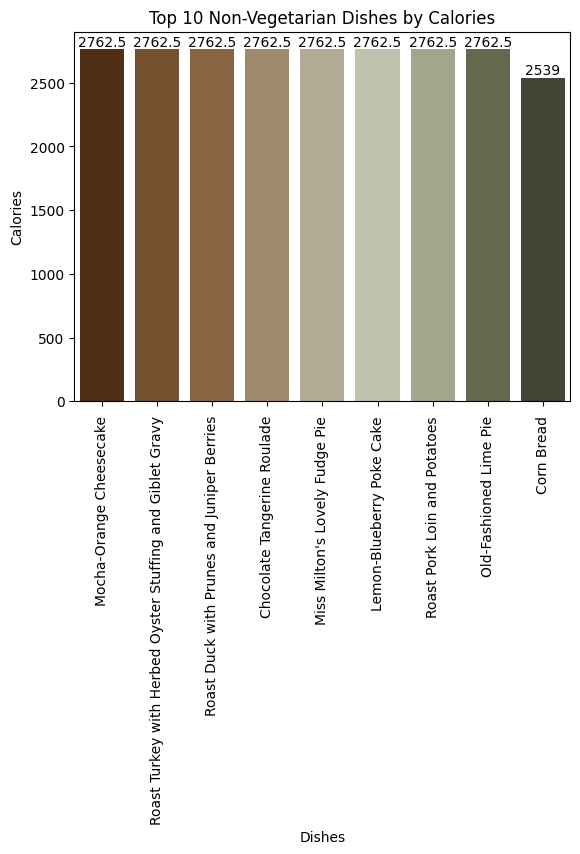

In [38]:
# Top 10 non-vegetarian dishes by calories
top_non_veg = df[df["vegetarian"] == 0].nlargest(10, "calories")

# Plot for Non-Vegetarian Dishes
ax = sns.barplot(data = top_non_veg, x = "title", y = "calories", palette = cust_pal)

plt.title("Top 10 Non-Vegetarian Dishes by Calories")
plt.xlabel("Dishes")
plt.ylabel("Calories")
plt.xticks(rotation = 90)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

**Observation:**

* A similar pattern can be observed here.

#### Top vegetarian dishes by protein count?

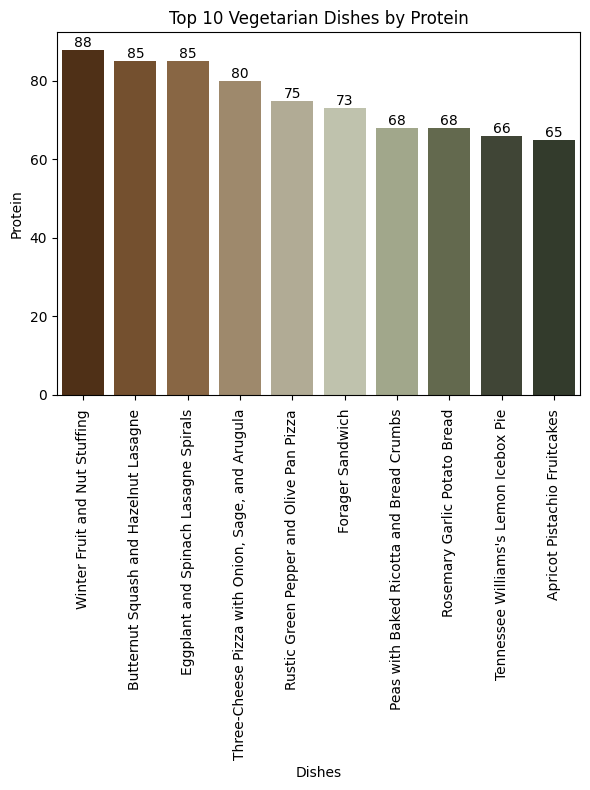

In [39]:
# Top 10 vegetarian dishes by protein
top_veg = df[df["vegetarian"] == 1].nlargest(10, "protein")

plt.figure(figsize = (6, 8))

# Plot for Vegetarian Dishes
ax = sns.barplot(data = top_veg, x = "title", y = "protein", palette = cust_pal)

plt.title("Top 10 Vegetarian Dishes by Protein")
plt.xlabel("Dishes")
plt.ylabel("Protein")
plt.xticks(rotation = 90)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

**Observation:**

* A veg dish high in protein can be beneficial for those looking to increase their protein intake for health, fitness, or dietary reasons.

#### Top non-vegetarian dishes by protein count?

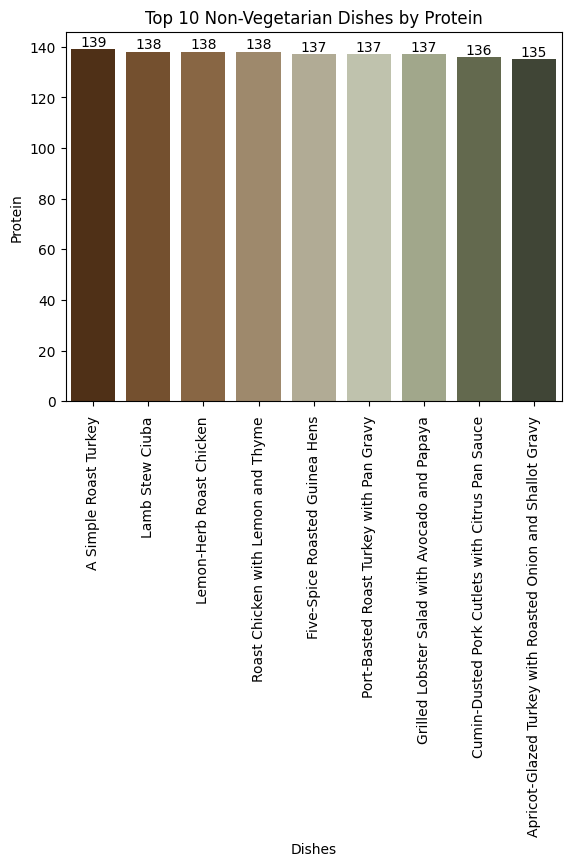

In [40]:
# Top 10 non-vegetarian dishes by protein
top_non_veg = df[df["vegetarian"] == 0].nlargest(10, "protein")

# Plot for Non-Vegetarian Dishes
ax = sns.barplot(data = top_non_veg, x = "title", y = "protein", palette = cust_pal)

plt.title("Top 10 Non-Vegetarian Dishes by Protein")
plt.xlabel("Dishes")
plt.ylabel("Protein")
plt.xticks(rotation = 90)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()

**Observation:**

* We know that non-vegetarian dishes often provide more protein compared to vegetarian options, which can also be concluded from the above bar graph.
* Thus, these non-veg dishes should be most preferred by individuals who are looking to increase their protein intake, support muscle growth, or follow a high-protein diet.